In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### **【問題1】ジニ不純度を求める関数**

In [5]:
def gini(y, classes):
    n = y.shape[0]
    gini_score = 1 - sum([(len(y[y == c]) / n) ** 2 for c in classes])
    
    return gini_score

In [11]:
# example1
sample_y_1 = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])
sample_classes_1 = np.unique(sample_y)

print('ジニ不純度：', gini(sample_y_1, sample_classes_1))

ジニ不純度： 0.5


In [12]:
# example2
sample_y_2 = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])
sample_classes_2 = np.unique(sample_y_2)

print('ジニ不純度：', gini(sample_y_2, sample_classes_2))

ジニ不純度： 0.6666666666666667


In [13]:
# example3
sample_y_3 = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])
sample_classes_3 = np.unique(sample_y_3)

print('ジニ不純度：', gini(sample_y_3, sample_classes_3))

ジニ不純度： 0.48


In [14]:
# example4
sample_y_4 = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
sample_classes_4 = np.unique(sample_y_4)

print('ジニ不純度：', gini(sample_y_4, sample_classes_4))

ジニ不純度： 0.0


### **【問題2】情報利得を求める関数**

In [17]:
def information_gain(y_p, y_left, y_right):
    y_p_classes = np.unique(y_p)
    gini_p = gini(y_p, y_p_classes)
    y_left_classes = np.unique(y_left)
    gini_left = gini(y_left, y_left_classes)
    y_right_classes = np.unique(y_right)
    gini_right = gini(y_right, y_right_classes)
    info_gain = gini_p - (len(y_left)/float(len(y_p)))*gini_left - (len(y_right)/float(len(y_p)))*gini_right
    
    return info_gain

In [18]:
sample_y_2 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
sample_classes_2 = np.unique(sample_y_2)
sample_y_3 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])
sample_classes_3 = np.unique(sample_y_3)
sample_y_4 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
sample_classes_4 = np.unique(sample_y_4)

information_gain(sample_y_4, sample_y_2, sample_y_3)

0.14319526627218937

In [22]:
a = np.array([[1, 2], [4, 9], [4, 8]])
a[1][1]

9

### **【問題3】深さ1の決定木分類器クラスの作成**

### **【問題4】（アドバンス課題）深さ2の決定木分類器クラスの作成**

### **【問題5】（アドバンス課題）任意の深さに対応できる決定木分類器クラスの作成**

In [100]:
# 重み付きジニ→実質的な情報利得（親ノードのジニを引くという操作をしていないだけ）
def gini_score(X, y, feature_idx, threshold):
    gini = 0
    sample_num = len(y)
        
    cls_y = [y[X[:, feature_idx] >= threshold], y[X[:, feature_idx] < threshold]]
        
    for group in cls_y:
        score = 0
        classes = np.unique(group)
        for cls in classes:
            score += (np.sum(group == cls)/len(group))**2
        gini += (1 - score) * (len(group)/sample_num)
        
    return gini
    
def best_split(X, y):
    features = X.shape[1]
    best_threshold = None
    best_feature = None
    gini = 0
    gini_min = 1
        
    for feature_idx in range(features):
        values = X[:, feature_idx]
        for val in values:
            gini = gini_score(X, y, feature_idx, val)
            if gini_min > gini:
                gini_min = gini
                best_threshold = val
                best_feature = feature_idx
    return gini_min, best_threshold, best_feature
        

# メイン処理する用
class _ScratchDecesionTreeNode():
    
    def __init__(self, X, y, max_depth):
        self.left = None
        self.right = None
        self.max_depth = max_depth
        self.X = X
        self.y = y
        self.threshold = None
        self.feature = None
        self.gini_min = None
        # 正解ラベルの中で一番多いクラスをそのノードのラベルとする
        self.label = np.argmax(np.bincount(y))
    
    # 木の生成
    def split(self, depth):
        self.depth = depth
        self.gini_min, self.threshold, self.feature = best_split(self.X, self.y)
        
        # 停止条件（ノードの不純度が0 or 木の深さがmax_depthに到達）
        if self.depth == self.max_depth or self.gini_min == 0:
            return
        
        # 左右のノードに分割
        idx_left = self.X[:, self.feature] >= self.threshold
        idx_right = self.X[:, self.feature] < self.threshold
        
        # 各ノードに対応する子オブジェクトを生成
        self.left = _ScratchDecesionTreeNode(self.X[idx_left], self.y[idx_left], self.depth)
        self.right = _ScratchDecesionTreeNode(self.X[idx_right], self.y[idx_right], self.depth)
        # 木の深さを一つ深くして同じ作業→停止条件を満たすまで繰り返す
        self.left.split(self.depth + 1)
        self.right.split(self.depth + 1)
        
    def predict(self, X):
        # 停止条件を満たすならラベル付け
        if self.gini_min == 0 or self.depth == self.max_depth:
            return self.label
        # 停止条件を満たさない時は、さらに不純度を小さくするよう分割
        else:
            if X[self.feature] > self.threshold:
                return self.left.predict(X)
            else:
                return self.right.predict(X)

# 最後に呼び出すだけ用           
class ScratchDecisionTreeClassifier():
    def __init__(self, max_depth):
        self.max_depth = max_depth
        self.tree = None
        
    def fit(self, X, y):
        initial_depth = 0
        self.tree = _ScratchDecesionTreeNode(X, y, self.max_depth)
        self.tree.split(initial_depth)
        
    def predict(self, X):
        pred = []
        for s in X:
            pred.append(self.tree.predict(s))
        return np.array(pred)
        
        
        

In [101]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:100, [0, 1]]
y = iris.target[:100]

In [102]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [103]:
stree = ScratchDecisionTreeClassifier(max_depth=2)
stree.fit(X_train, y_train)

In [104]:
y_pred = stree.predict(X_test)

### **【問題6】指標値の算出**

In [105]:
print('Accuracy :', np.sum(y_pred == y_test)/len(y_test))

Accuracy : 0.92


In [106]:
scores = []
for i in range(1, 31):
    stree_i = ScratchDecisionTreeClassifier(max_depth=i)
    stree_i.fit(X_train, y_train)
    y_pred_i = stree_i.predict(X_test)
    accuracy_i = np.sum(y_pred_i == y_test)/len(y_test)
    scores.append(accuracy_i)
print(scores)

[0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92]


### **【問題7】決定領域の可視化**

In [98]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):

    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

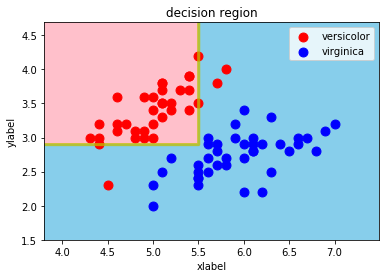

In [99]:
decision_region(X_train, y_train, stree, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'])



In [79]:
stree4 = ScratchDecisionTreeClassifier(max_depth=4)
stree4.fit(X_train, y_train)

In [80]:
stree4.predict(X_test)

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0])

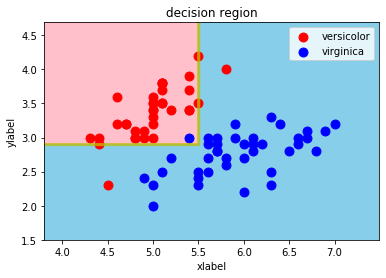

In [81]:
decision_region(X_train, y_train, stree4, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'])